# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [70]:
import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import Household


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

*Explain the Code*

Here we illustrate how the relative hours worked by females at home compared to males change change as $\alpha$ and $\sigma$ 

To make the code work we alter line 57 in the Household.py file, such at it not only decribe the case where the $\sigma$=1. But, also the $\sigma$=0 and neither 1 or 0. 

with an alpha = 0.25 and a sigma = 0.5, we get that HF/HM = 3.00 / 5.50 = 0.55
with an alpha = 0.25 and a sigma = 1.0, we get that HF/HM = 2.00 / 6.50 = 0.31
with an alpha = 0.25 and a sigma = 1.5, we get that HF/HM = 1.50 / 7.00 = 0.21
with an alpha = 0.5 and a sigma = 0.5, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.5 and a sigma = 1.0, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.5 and a sigma = 1.5, we get that HF/HM = 4.50 / 4.50 = 1.00
with an alpha = 0.75 and a sigma = 0.5, we get that HF/HM = 5.50 / 3.00 = 1.83
with an alpha = 0.75 and a sigma = 1.0, we get that HF/HM = 6.50 / 2.00 = 3.25
with an alpha = 0.75 and a sigma = 1.5, we get that HF/HM = 7.00 / 1.50 = 4.67


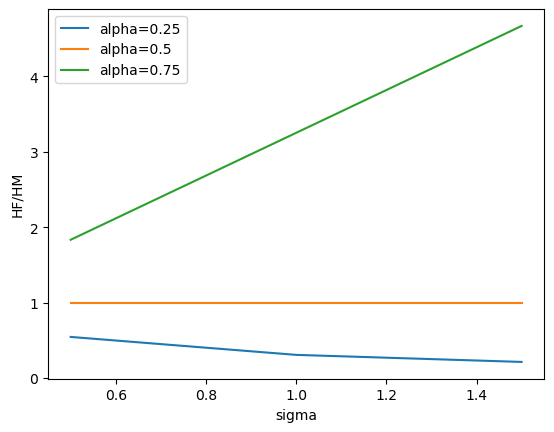

In [71]:
# Define the necessary parameters
alpha_list = [0.25, 0.50, 0.75]
sigma_list = [0.5, 1.0, 1.5]

# initialize dictionary to store results
resultsHF = {}
resultsHM = {}
resultsHFHNM = {}

# foreach combination of alpha and sigma, print the ratio of optimal HF/HM
for alpha in alpha_list:    
    for sigma in sigma_list:
        # set new values for alpha and sigma
        model = Household.HouseholdSpecializationModelClass()
        model.par.alpha = alpha
        model.par.sigma = sigma

        # solve the model
        opt = model.solve_discrete()
        # store the result
        resultsHF[(alpha, sigma)] = opt.HF
        resultsHM[(alpha, sigma)] = opt.HM
        resultsHFHNM[(alpha, sigma)] = opt.HF/opt.HM

        # print results
        print(f"with an alpha = {alpha} and a sigma = {sigma}, we get that HF/HM = {opt.HF:.2f} / {opt.HM:.2f} = {opt.HF/opt.HM:.2f}")
                       
# plot the results
fig, ax = plt.subplots()
for alpha in alpha_list:
    y = [resultsHFHNM[(alpha, sigma)] for sigma in sigma_list]
    ax.plot(sigma_list, y, label=f"alpha={alpha}")
ax.set_xlabel("sigma")
ax.set_ylabel("HF/HM")
ax.legend()
plt.show()

$\sigma$ has no effect when $\alpha$ = 0.5

elasiticy of substition

# Question 2

*Explain the code*
Plot the log(HF/HM) againt the log(wf/wm)

The wages for females are [0.8 0.9 1.  1.1 1.2]
1.25
1.0
1.0
0.8888888888888888
0.8


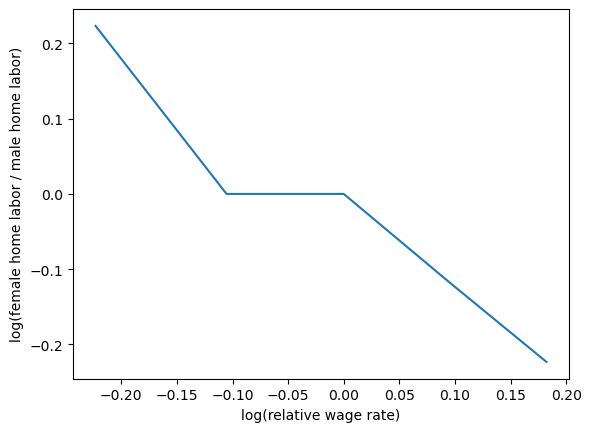

In [46]:
import numpy as np
from types import SimpleNamespace
from Household import HouseholdSpecializationModelClass

# 1. Create an instance of the HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# 2. Define the vector of wage rates
wf = model.par.wF_vec
print(f"The wages for females are {wf}")
           
# 3. Create an empty array to store the optimal labor supply
temp_ratio= np.zeros_like(wf)

# 4. Loop over the wage rates and find the optimal labor supply
for i, wage in enumerate(wf):
    model.par.wF = wage
    opt = model.solve_discrete()
    ratio = opt.HF/opt.HM
    temp_ratio[i]=ratio

    # 5. Print or plot the results
    print(ratio)
   
# 6. Plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.log(wf), np.log(temp_ratio)) # the famale wage is the equal to the realtive becuase the wm = 1
plt.xlabel("log(relative wage rate)")
plt.ylabel("log(female home labor / male home labor)")
plt.show()


# Question 3

Explain your code and procedure

In [40]:
# code


[0.8 0.9 1.  1.1 1.2]
0.8


ADD CONCISE CONLUSION.